In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # MobileNetV2-specific preprocessing
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Same preprocessing for validation
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Same preprocessing for test
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plantdata/train',  # Path to training data
    target_size=(224, 224),  # MobileNetV2 input size
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/plantdata/val',  # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/plantdata/test',  # Path to test data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3251 images belonging to 4 classes.
Found 697 images belonging to 4 classes.
Found 697 images belonging to 4 classes.


In [27]:
model = Sequential()

# Load the pre-trained MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)  # Add MobileNetV2 as the first layer
model.add(GlobalAveragePooling2D())  # Add a pooling layer
model.add(Dense(1024, activation='relu'))  # Add a dense layer
model.add(Dense(4, activation='softmax'))  # Output layer for 5 classes

# Freeze the pre-trained base model
base_model.trainable = False


In [28]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Use a small learning rate for fine-tuning
    loss='categorical_crossentropy',  # Loss for multi-class classification
    metrics=['accuracy']  # Accuracy metric to track performance
)


In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust the number of epochs based on your dataset
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
100/101 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step - accuracy: 0.8251 - loss: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 619s 6s/step - accuracy: 0.8270 - loss: 0.5573 - val_accuracy: 0.9732 - val_loss: 0.1156
Epoch 2/10
  1/101 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9688 - loss: 0.0724

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.9688 - loss: 0.0724 - val_accuracy: 1.0000 - val_loss: 0.0573
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 73s 163ms/step - accuracy: 0.9831 - loss: 0.0833 - val_accuracy: 0.9777 - val_loss: 0.0744
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0276
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.9929 - loss: 0.0418 - val_accuracy: 0.9881 - val_loss: 0.0495
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.9688 - loss: 0.0584 - val_accuracy: 1.0000 - val_loss: 0.0455
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.9981 - loss: 0.0226 - val_accuracy: 0.9792 - val_loss: 0.0536
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0405
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.9979 - loss: 0.0194 - val_acc

In [30]:
model.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 195s 9s/step - accuracy: 0.9925 - loss: 0.0331


[0.0419565811753273, 0.9856528043746948]

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,205,518 (23.67 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,631,690 (10.04 MB)

In [39]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
imgpath="/content/drive/MyDrive/plantdata/test/Apple___Apple_scab/image (11).JPG"
img=load_img(imgpath,target_size=(224,224))
imga=img_to_array(img)
imga=np.expand_dims(imga,axis=0)
imga=preprocess_input(imga)
pred=model.predict(imga)
print(pred[0])
categories=["Apple_scab","Apple_Black_rot","Cedar_Apple","Healthy"]
print(categories[np.argmax(pred[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[9.9762303e-01 5.7088037e-06 2.3675035e-03 3.7911366e-06]
Apple_scab


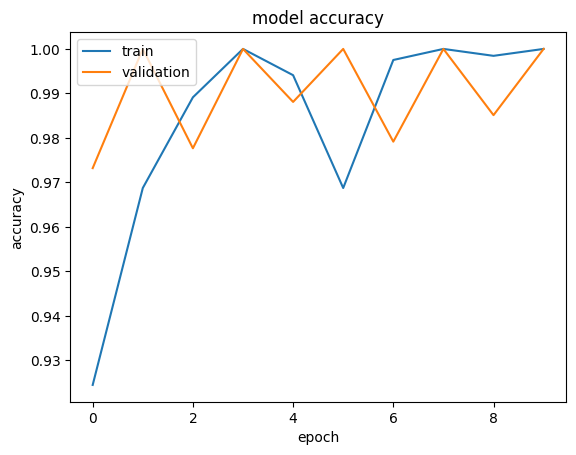

In [40]:
#test,train plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


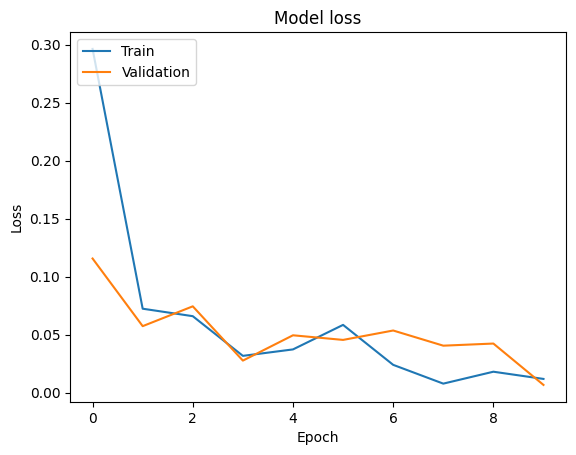

Train Accuracy: 1.0000
Validation Accuracy: 1.0000
Train Loss: 0.0118
Validation Loss: 0.0067
Good Generalization: Model is performing well and generalizing to unseen data.


In [41]:
# prompt: gnerate accuracy,loss,bias vafiance tradeoff

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Analyze for Bias-Variance Tradeoff
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


# Interpretation (Illustrative Example)
if abs(train_accuracy - val_accuracy) > 0.1 and val_accuracy < 0.7:  #Example Thresholds, Adjust as Needed
  print("High Variance: Model is overfitting. Consider regularization techniques (dropout, L1/L2), data augmentation, or reducing model complexity.")
elif train_accuracy < 0.7 and val_accuracy < 0.7:
  print("High Bias: Model is underfitting. Try increasing model complexity, adding more layers or neurons, or training for more epochs.")
elif abs(train_accuracy - val_accuracy) < 0.05 and train_accuracy>0.8: #Example Thresholds, Adjust as Needed
  print("Good Generalization: Model is performing well and generalizing to unseen data.")
else:
  print("Consider further analysis and tuning.")

In [43]:
# prompt: test accuracy and test loss

test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9830 - loss: 0.0447
Test Loss: 0.0420
Test Accuracy: 0.9857


In [46]:
model.save('/content/drive/MyDrive/plantdata/mobiletlmodel.saved_model')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/plantdata/mobiletlmodel.saved_model.